In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, Flatten, MaxPooling1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [2]:
df = pd.read_csv("./VBOX _supervised_scaled_reduced_and_labels.csv")

In [3]:
df.head()

,y,time,sats,long,lat,velocity,heading,height,vert-vel,GPS-Longacc,turn-radius,Centre-Line-Deviation,AbsHead,Longacc,Latacc,rel-height
0,0.0,0.000000,0.78,0.956592,0.218346,0.0,0.0,0.191770,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
1,0.0,0.001245,0.80,0.956592,0.218342,0.0,0.0,0.189038,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
2,0.0,0.001324,0.80,0.956591,0.218343,0.0,0.0,0.189927,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
3,0.0,0.001404,0.80,0.956591,0.218344,0.0,0.0,0.190914,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
4,0.0,0.001483,0.80,0.956590,0.218345,0.0,0.0,0.191408,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973


In [4]:
train, test = train_test_split(df, test_size=.2) 

In [5]:
X_train = train.drop('y',axis=1)
X_train = X_train.to_numpy()
y_train = np.asarray(train['y'])

X_test = test.drop('y',axis=1)
X_test = X_test.to_numpy()
y_test = np.asarray(test['y'])

In [6]:
from imblearn.over_sampling import ADASYN 
from imblearn.under_sampling import RandomUnderSampler 

#rus = RandomUnderSampler() 

ada = ADASYN()  # Over sampling improved accuracy
X_resampled, y_resampled = ada.fit_sample(X_train, y_train) 

In [7]:
# Reshaping
shape = X_resampled.shape

X_train = X_resampled.reshape(shape[0],shape[1],1)



shape = X_test.shape

X_test = X_test.reshape(shape[0],shape[1],1)


print(X_train.shape,y_train.shape)


(7879, 15, 1) (5776,)


In [8]:
X_train.shape

(7879, 15, 1)

In [9]:
# fit and evaluate a model
(trainX, trainy, testX, testy) = (X_train,y_resampled,X_test,y_test)
verbose, epochs, batch_size = 0, 50, 8
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[0]
model = Sequential()
model.add(Conv1D(filters=15, kernel_size=2,  activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=50, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse'])
# fit network


history = model.fit(trainX, trainy, epochs=250, batch_size=32, verbose=2, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 6303 samples, validate on 1576 samples
Epoch 1/250
 - 2s - loss: 0.1807 - mean_squared_error: 0.1807 - val_loss: 0.2387 - val_mean_squared_error: 0.2387
Epoch 2/250
 - 1s - loss: 0.1597 - mean_squared_error: 0.1597 - val_loss: 0.2418 - val_mean_squared_error: 0.2418
Epoch 3/250
 - 1s - loss: 0.1485 - mean_squared_error: 0.1485 - val_loss: 0.2715 - val_mean_squared_error: 0.2715
Epoch 4/250
 - 1s - loss: 0.1399 - mean_squared_error: 0.1399 - val_loss: 0.2971 - val_mean_squared_error: 0.2971
Epoch 5/250
 - 1s - loss: 0.1348 - mean_squared_error: 0.1348 - val_loss: 0.2336 - val_mean_squared_error: 0.2336
Epoch 6/250
 - 1s - loss: 0.1301 - mean_squared_error: 0.1301 - val_loss: 0.2979 - val_mean_squared_error: 0.2979
Epoch 7/250
 - 1s - loss: 0.1261 

 - 1s - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 65/250
 - 1s - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.1450 - val_mean_squared_error: 0.1450
Epoch 66/250
 - 1s - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 67/250
 - 1s - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 68/250
 - 1s - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.1104 - val_mean_squared_error: 0.1104
Epoch 69/250
 - 1s - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 70/250
 - 1s - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.1441 - val_mean_squared_error: 0.1441
Epoch 71/250
 - 1s - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 72/250
 - 1s - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.1030 - val_mean_

 - 1s - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.1004 - val_mean_squared_error: 0.1004
Epoch 136/250
 - 1s - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.1367 - val_mean_squared_error: 0.1367
Epoch 137/250
 - 1s - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.1124 - val_mean_squared_error: 0.1124
Epoch 138/250
 - 1s - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.1198 - val_mean_squared_error: 0.1198
Epoch 139/250
 - 1s - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 140/250
 - 2s - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.1157 - val_mean_squared_error: 0.1157
Epoch 141/250
 - 1s - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.1045 - val_mean_squared_error: 0.1045
Epoch 142/250
 - 1s - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.1024 - val_mean_squared_error: 0.1024
Epoch 143/250
 - 1s - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.1447 - v

Epoch 206/250
 - 1s - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1127 - val_mean_squared_error: 0.1127
Epoch 207/250
 - 1s - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.1710 - val_mean_squared_error: 0.1710
Epoch 208/250
 - 1s - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.1083 - val_mean_squared_error: 0.1083
Epoch 209/250
 - 1s - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 210/250
 - 1s - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1219 - val_mean_squared_error: 0.1219
Epoch 211/250
 - 1s - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.1196 - val_mean_squared_error: 0.1196
Epoch 212/250
 - 1s - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0996 - val_mean_squared_error: 0.0996
Epoch 213/250
 - 1s - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 214/250
 - 1s - loss: 0.0410 - mean_squared_error: 0.0410 - val_lo

In [10]:
# evaluate model
_, mse = model.evaluate(testX, testy, batch_size=batch_size, verbose=2)

In [11]:
mse

0.034094028261886546

In [30]:
y_pred = []
pred_data = model.predict(testX)
for i in pred_data:
    if i < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [31]:
testy

array([0., 0., 0., ..., 0., 0., 1.])

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testy, y_pred)
print(confusion_matrix)

[[924  44]
 [ 16 461]]


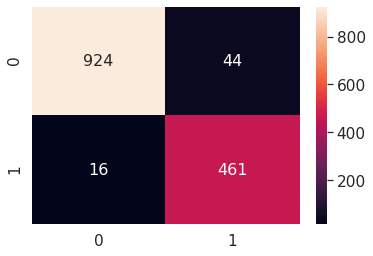

In [33]:
df_cm = pd.DataFrame(confusion_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(testy, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       968
         1.0       0.91      0.97      0.94       477

    accuracy                           0.96      1445
   macro avg       0.95      0.96      0.95      1445
weighted avg       0.96      0.96      0.96      1445



In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testy, y_pred)

0.04152249134948097

In [36]:
# model.save("cnn_acc_96.h5")